Starting worksheet generation for subskill ID: GEOM001-01-D
Loading CSV file: data/detailed_objectives_math.csv
Successfully loaded CSV with 1151 rows and columns: Subject, SubskillID, SubskillDescription, ConceptGroup, DetailedObjective
Looking for subskill ID: GEOM001-01-D

Extracted Data:
Subject: Mathematics
SubskillID: GEOM001-01-D
SubskillDescription: Recognize and name 3D shapes (cubes, cones, cylinders) and distinguish between 2D and 3D objects,Shape Recognition,Correctly identify and name basic 3D shapes (cube
Concept Groups: cone, stacks, Dimensional Awareness, party hat=cone, Match 2D shape drawings to their corresponding 3D shape objects (circle to cylinder, faces, Shape Construction
Detailed Objectives:
  - cylinder) when shown physical objects
  - slides)
  - Explain the difference between 2D shapes (flat) and 3D shapes (solid) using classroom objects
  - box=cube)
  - triangle to cone)
  - edges)
  - Create basic 3D shapes using modeling clay or building materials

Gener

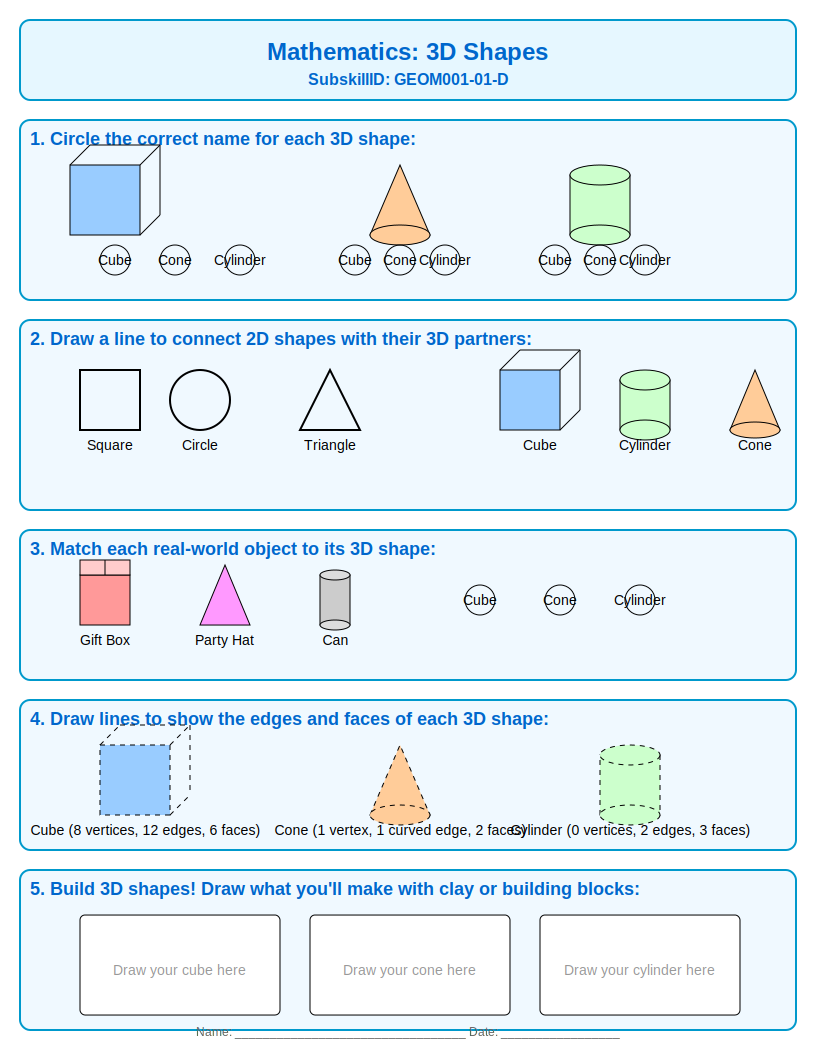

Saved SVG to file: worksheet_GEOM001_01_D.svg

Worksheet generation complete!
Starting worksheet generation for subskill ID: GEOM001-01-D
Loading CSV file: example_objectives.csv
ERROR: Failed to load CSV file - No columns to parse from file


In [ ]:
# Improved Claude Worksheet Generator with Response Logging
# For use in Jupyter Notebook

import pandas as pd
import os
import time
import json
from datetime import datetime
from IPython.display import display, SVG, HTML
import anthropic

# Cell 1: Load and validate CSV
def load_learning_objectives(csv_file):
    """Load learning objectives from CSV file"""
    print(f"Loading CSV file: {csv_file}")
    
    try:
        df = pd.read_csv(csv_file)
        print(f"Successfully loaded CSV with {len(df)} rows and columns: {', '.join(df.columns)}")
        return df
    except Exception as e:
        print(f"ERROR: Failed to load CSV file - {str(e)}")
        return None

# Cell 2: Extract data for a specific subskill ID
def get_subskill_data(df, subskill_id):
    """Extract all data for a specific subskill ID"""
    print(f"Looking for subskill ID: {subskill_id}")
    
    # Filter rows by subskill ID
    matching_rows = df[df['SubskillID'] == subskill_id]
    
    if matching_rows.empty:
        print(f"ERROR: No matching entries found for subskill ID: {subskill_id}")
        return None
    
    # Extract data
    subject = matching_rows['Subject'].iloc[0]
    subskill_description = matching_rows['SubskillDescription'].iloc[0]
    concept_groups = matching_rows['ConceptGroup'].tolist()
    detailed_objectives = matching_rows['DetailedObjective'].tolist()
    
    # Create formatted data
    data = {
        'Subject': subject,
        'SubskillID': subskill_id,
        'SubskillDescription': subskill_description,
        'ConceptGroups': concept_groups,
        'DetailedObjectives': detailed_objectives
    }
    
    # Print the data we found
    print("\nExtracted Data:")
    print(f"Subject: {subject}")
    print(f"SubskillID: {subskill_id}")
    print(f"SubskillDescription: {subskill_description}")
    print(f"Concept Groups: {', '.join(concept_groups)}")
    print(f"Detailed Objectives:")
    for obj in detailed_objectives:
        print(f"  - {obj}")
    
    return data

# Cell 3: Generate worksheet using Anthropic SDK
def generate_svg_worksheet(subskill_data, api_key=None, save_responses=True, responses_dir="claude_responses"):
    """Generate an SVG worksheet using the Anthropic SDK"""
    print("\nGenerating worksheet with Claude...")
    
    # Use API key from environment variable or parameter
    if api_key:
        print("Using provided API key")
        anthropic_api_key = api_key
    else:
        anthropic_api_key = os.environ.get('ANTHROPIC_API_KEY')
        if not anthropic_api_key:
            print("ERROR: ANTHROPIC_API_KEY environment variable not set")
            print("Please set your API key with: os.environ['ANTHROPIC_API_KEY'] = 'your-api-key'")
            return None
        else:
            print("Using API key from environment variable")
    
    # Create Anthropic client
    client = anthropic.Anthropic(api_key=anthropic_api_key)
    
    # Format prompt for Claude
    concept_groups_text = ", ".join(subskill_data['ConceptGroups'])
    detailed_objectives_text = "; ".join(subskill_data['DetailedObjectives'])
    
    prompt = f"""Create an SVG worksheet for elementary students based on the following learning objective:

Subject: {subskill_data['Subject']}
SubskillID: {subskill_data['SubskillID']}
SubskillDescription: {subskill_data['SubskillDescription']}
Concept Groups: {concept_groups_text}
Detailed Worksheet Material: {detailed_objectives_text}

The worksheet should:
1. Include the subject and subskill ID in the header
2. Create age-appropriate practice problems for each concept group
3. Include visual elements that help illustrate the concepts
4. Be complete and ready to print as a worksheet
5. Have clear instructions for each activity

Please generate ONLY the SVG code without any explanations or markdown.
"""
    
    print("Sending request to Claude API (claude-3-7-sonnet-20250219)...")
    start_time = time.time()
    
    try:
        # Make the API request
        response = client.messages.create(
            model="claude-3-7-sonnet-20250219",  # Updated to the requested model
            max_tokens=8000,
            messages=[
                {"role": "user", "content": prompt}
            ]
        )
        
        end_time = time.time()
        time_taken = end_time - start_time
        print(f"Received response in {time_taken:.2f} seconds")
        
        # Save the full response if requested
        if save_responses:
            # Create directory if it doesn't exist
            if not os.path.exists(responses_dir):
                os.makedirs(responses_dir)
                print(f"Created directory for responses: {responses_dir}")
            
            # Generate timestamp and filename
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            filename = f"{responses_dir}/claude_response_{subskill_data['SubskillID']}_{timestamp}.json"
            
            # Save full response as JSON
            with open(filename, 'w') as f:
                # Convert response object to dict for JSON serialization
                response_dict = {
                    "id": response.id,
                    "content": [{"text": item.text, "type": item.type} for item in response.content],
                    "model": response.model,
                    "role": response.role,
                    "prompt": prompt,
                    "time_taken": time_taken
                }
                json.dump(response_dict, f, indent=2)
            
            print(f"Full Claude response saved to: {filename}")
        
        # Extract content
        content = response.content[0].text
        
        # Also save the raw text content for easier access
        if save_responses:
            text_filename = f"{responses_dir}/claude_response_{subskill_data['SubskillID']}_{timestamp}.txt"
            with open(text_filename, 'w') as f:
                f.write(content)
            print(f"Raw text response saved to: {text_filename}")
        
        # Extract SVG content
        svg_content = None
        if "```svg" in content:
            svg_start = content.find("```svg") + 6
            svg_end = content.find("```", svg_start)
            svg_content = content[svg_start:svg_end].strip()
            print("Found SVG content in code block")
        elif "```xml" in content:
            svg_start = content.find("```xml") + 6
            svg_end = content.find("```", svg_start)
            svg_content = content[svg_start:svg_end].strip()
            print("Found SVG content in XML code block")
        elif "<?xml" in content:
            svg_start = content.find("<?xml")
            svg_end = content.find("</svg>") + 6
            svg_content = content[svg_start:svg_end].strip()
            print("Found raw SVG content")
        else:
            # Assume the entire response is SVG
            svg_content = content.strip()
            print("Using entire response as SVG content")
        
        print(f"SVG content length: {len(svg_content)} characters")
        
        # Also print first few characters of SVG to verify
        preview_length = min(150, len(svg_content))
        print(f"SVG content preview: {svg_content[:preview_length]}...")
        
        return svg_content
        
    except Exception as e:
        end_time = time.time()
        time_taken = end_time - start_time
        print(f"ERROR: API request failed after {time_taken:.2f} seconds")
        print(f"Error message: {str(e)}")
        return None

# Cell 4: Display and save the SVG worksheet
def process_worksheet(svg_content, subskill_id, save=True):
    """Display the SVG in the notebook and optionally save to a file"""
    if not svg_content:
        print("No SVG content to display or save")
        return
    
    print("\nDisplaying SVG in notebook:")
    display(SVG(svg_content))
    
    if save:
        # Create a filename from the subskill ID
        safe_filename = ''.join(c if c.isalnum() else '_' for c in subskill_id)
        filename = f"worksheet_{safe_filename}.svg"
        
        try:
            with open(filename, 'w') as f:
                f.write(svg_content)
            print(f"Saved SVG to file: {filename}")
        except Exception as e:
            print(f"ERROR: Failed to save SVG to file - {str(e)}")

# Cell 5: Main function to generate a worksheet
def create_worksheet(csv_file, subskill_id, api_key=None, save=True, save_responses=True):
    """Main function to create an SVG worksheet for a specific subskill ID"""
    print(f"Starting worksheet generation for subskill ID: {subskill_id}")
    
    # Step 1: Load CSV data
    df = load_learning_objectives(csv_file)
    if df is None:
        return
    
    # Step 2: Extract the subskill data
    subskill_data = get_subskill_data(df, subskill_id)
    if subskill_data is None:
        return
    
    # Step 3: Generate the SVG worksheet
    svg_content = generate_svg_worksheet(subskill_data, api_key, save_responses)
    if svg_content is None:
        return
    
    # Step 4: Display and save the worksheet
    process_worksheet(svg_content, subskill_id, save)
    
    print("\nWorksheet generation complete!")
    return svg_content

# Function to show a previously saved response
def view_saved_response(response_file):
    """Display a previously saved Claude response"""
    try:
        if response_file.endswith('.json'):
            with open(response_file, 'r') as f:
                response_data = json.load(f)
            
            print(f"Response ID: {response_data.get('id', 'Unknown')}")
            print(f"Model: {response_data.get('model', 'Unknown')}")
            print(f"Time taken: {response_data.get('time_taken', 'Unknown')} seconds\n")
            
            # Display the prompt
            print("Prompt:")
            print(response_data.get('prompt', 'Not available'))
            print("\nResponse:")
            
            # Display content
            for item in response_data.get('content', []):
                print(item.get('text', ''))
        
        elif response_file.endswith('.txt'):
            with open(response_file, 'r') as f:
                content = f.read()
            print(content)
        
    except Exception as e:
        print(f"Error loading response file: {str(e)}")

# Example usage

# Option 1: Set your API key in the environment
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Example: Generate a worksheet with comprehensive logging

ANTHROPIC_API_KEY = os.getenv('ANTHROPIC_API_KEY')
if not ANTHROPIC_API_KEY:
    raise ValueError("ANTHROPIC_API_KEY not found in environment variables")

# Generate a worksheet
svg_content = create_worksheet(
    csv_file='data/detailed_objectives_math.csv',
    subskill_id='GEOM001-01-D',
    api_key=ANTHROPIC_API_KEY,
    save_responses=True  # Save all Claude responses
)

# Generate worksheet from example data
svg_content = create_worksheet(
    csv_file='example_objectives.csv',
    subskill_id='GEOM001-01-D',
    save_responses=True
)


In [13]:
import csv
import re

def fix_csv_quotes(input_file, output_file):
    """
    Fix improperly quoted CSV files where quotes aren't correctly placed
    around fields containing commas.
    
    This script specifically handles cases where parenthetical expressions with commas
    are split across fields incorrectly.
    """
    print(f"Processing {input_file}...")
    
    # Read the file as text first
    with open(input_file, 'r', encoding='utf-8') as f:
        content = f.read()
    
    # Get the header to know our column structure
    header = content.split('\n')[0]
    columns = header.split(',')
    num_columns = len(columns)
    print(f"Detected {num_columns} columns: {columns}")
    
    # Define column indices based on your expected structure
    # This helps us know which columns to check for parenthetical expressions
    subject_col = 0
    subskill_id_col = 1
    subskill_desc_col = 2
    concept_group_col = 3
    detailed_obj_col = 4
    
    # Process the file line by line
    fixed_lines = [header]  # Start with the header
    
    # Process content lines
    for line_num, line in enumerate(content.split('\n')[1:], 2):
        if not line.strip():  # Skip empty lines
            continue
            
        # Parse the line, tracking quote status
        tokens = []
        current_token = ""
        in_quotes = False
        
        for char in line:
            if char == '"':
                in_quotes = not in_quotes
                current_token += char
            elif char == ',' and not in_quotes:
                tokens.append(current_token)
                current_token = ""
            else:
                current_token += char
        
        tokens.append(current_token)  # Add the last token
        
        # If we have the correct number of columns and no issues, keep the line as is
        if len(tokens) == num_columns:
            # Check if all fields with commas are properly quoted
            all_fields_proper = True
            for token in tokens:
                if ',' in token and not (token.startswith('"') and token.endswith('"')):
                    all_fields_proper = False
                    break
                    
            if all_fields_proper:
                fixed_lines.append(line)
                continue
                
        # We need to fix the line
        print(f"Line {line_num} needs fixing (has {len(tokens)} fields, expected {num_columns})")
        
        # Split the line by commas outside quotes
        raw_parts = []
        part = ""
        in_quotes = False
        
        for char in line:
            if char == '"':
                in_quotes = not in_quotes
                part += char
            elif char == ',' and not in_quotes:
                raw_parts.append(part)
                part = ""
            else:
                part += char
        raw_parts.append(part)  # Add the last part
        
        # Now we'll rebuild the fields correctly
        fixed_fields = []
        
        # First, extract the straightforward fields
        if len(raw_parts) >= 1:
            fixed_fields.append(raw_parts[0])  # Subject
        else:
            fixed_fields.append("")
            
        if len(raw_parts) >= 2:
            fixed_fields.append(raw_parts[1])  # SubskillID
        else:
            fixed_fields.append("")
        
        # Handle SubskillDescription field which may have commas
        subskill_desc = ""
        concept_group = ""
        detailed_obj = ""
        
        # Analyze the fields to determine patterns
        has_parenthetical_at_end = False
        parenthetical_fields = []
        
        # Look for parentheses patterns in the raw parts
        paren_start_idx = -1
        paren_content = ""
        in_parentheses = False
        
        # First extract what should be in the SubskillDescription field
        if len(raw_parts) >= 3:
            # Start with what's in the third column
            current_field = raw_parts[2]
            
            # Check if this is the start of a quoted field
            if current_field.startswith('"'):
                # It's quoted, so gather all parts until we find a closing quote
                subskill_parts = [current_field]
                quote_found = current_field.count('"') >= 2
                
                i = 3
                while i < len(raw_parts) and not quote_found:
                    current_part = raw_parts[i]
                    subskill_parts.append(current_part)
                    
                    if '"' in current_part:
                        quote_found = True
                        
                        # Extract everything before the quote
                        quote_pos = current_part.rfind('"')
                        before_quote = current_part[:quote_pos+1]
                        after_quote = current_part[quote_pos+1:]
                        
                        # Last part may contain both SubskillDescription and ConceptGroup
                        if after_quote and after_quote.startswith(','):
                            after_quote = after_quote[1:]  # Remove leading comma
                            
                        subskill_parts[-1] = before_quote
                        
                        # The remainder becomes ConceptGroup
                        concept_group = after_quote
                    
                    i += 1
                
                # Join the parts to form SubskillDescription
                subskill_desc = ','.join(subskill_parts)
                
                # If we didn't reach the end and haven't set ConceptGroup
                if i < len(raw_parts) and not concept_group:
                    concept_group = raw_parts[i]
                    i += 1
                
                # Everything remaining goes into DetailedObjective
                if i < len(raw_parts):
                    detailed_obj_parts = raw_parts[i:]
                    detailed_obj = ','.join(detailed_obj_parts)
            else:
                # Not quoted, just take the part as is
                subskill_desc = current_field
                
                if len(raw_parts) >= 4:
                    concept_group = raw_parts[3]
                    
                if len(raw_parts) >= 5:
                    detailed_obj_parts = raw_parts[4:]
                    detailed_obj = ','.join(detailed_obj_parts)
        
        # Handle special case: Check for misplaced quotes in SubskillDescription
        # Pattern like: "text with commas,ConceptGroup"
        if subskill_desc.startswith('"') and not subskill_desc.endswith('"') and ',' in subskill_desc:
            # Look for the last comma that might separate SubskillDescription from ConceptGroup
            parts = subskill_desc.split(',')
            
            # Special case: we're looking for a pattern where the field ends with a quoted string
            # followed by a field that should be separate
            found = False
            for i in range(len(parts) - 1, 0, -1):
                if parts[i] and '"' in parts[i]:
                    # This part contains a quote, might be the end of SubskillDescription
                    quote_pos = parts[i].find('"')
                    
                    # If this is a closing quote and not an opening one
                    if quote_pos > 0 or parts[i].count('"') > 1:
                        # Split at this point
                        subskill_parts = parts[:i+1]
                        concept_parts = parts[i+1:]
                        
                        # Adjust the parts
                        if quote_pos > 0:
                            subskill_parts[-1] = parts[i][:quote_pos+1]
                            concept_parts = [parts[i][quote_pos+1:]] + concept_parts
                        
                        # Reassemble
                        subskill_desc = ','.join(subskill_parts)
                        
                        # If we already have a concept_group, prepend these parts
                        if concept_group:
                            concept_group = ','.join(concept_parts) + ',' + concept_group
                        else:
                            concept_group = ','.join(concept_parts)
                            
                        found = True
                        break
            
            # If we didn't find a pattern, just ensure there's a closing quote
            if not found and not subskill_desc.endswith('"'):
                subskill_desc = subskill_desc + '"'
        
        # Now fix parenthetical expressions at the end of DetailedObjective that got split
        # Pattern: "text (item1",item2,item3)
        if detailed_obj.startswith('"') and '(' in detailed_obj and not detailed_obj.endswith('"'):
            # Find the closing parenthesis
            paren_found = False
            
            # Check if there's a closing parenthesis in any part
            for i, part in enumerate(detailed_obj.split(',')):
                if ')' in part:
                    # Found closing parenthesis
                    paren_found = True
                    break
            
            # If no closing parenthesis found, add it
            if not paren_found:
                detailed_obj = detailed_obj + ')'
            
            # Ensure the field is properly quoted
            if not detailed_obj.endswith('"'):
                detailed_obj = detailed_obj + '"'
        
        # Ensure all fields are properly quoted if they contain commas
        if ',' in subskill_desc and not (subskill_desc.startswith('"') and subskill_desc.endswith('"')):
            subskill_desc = '"' + subskill_desc.strip('"') + '"'
            
        if ',' in detailed_obj and not (detailed_obj.startswith('"') and detailed_obj.endswith('"')):
            detailed_obj = '"' + detailed_obj.strip('"') + '"'
        
        # Add the fixed fields
        fixed_fields.append(subskill_desc)
        fixed_fields.append(concept_group)
        fixed_fields.append(detailed_obj)
        
        # Handle cases where we might have too many or too few fields
        if len(fixed_fields) < num_columns:
            # Add empty fields as needed
            while len(fixed_fields) < num_columns:
                fixed_fields.append("")
        elif len(fixed_fields) > num_columns:
            # Truncate excess fields
            fixed_fields = fixed_fields[:num_columns]
        
        # Join fields back together
        fixed_line = ','.join(fixed_fields)
        fixed_lines.append(fixed_line)
    
    # Write the fixed content
    with open(output_file, 'w', encoding='utf-8', newline='') as f:
        f.write('\n'.join(fixed_lines))
    
    print(f"Fixed file written to {output_file}")
    print(f"Processed {len(fixed_lines) - 1} data rows")
    
    # Return a sample of the fixed lines for verification
    sample_size = min(5, len(fixed_lines) - 1)
    if sample_size > 0:
        print("\nSample of fixed lines:")
        for i in range(1, sample_size + 1):
            print(f"Line {i}: {fixed_lines[i]}")
    
    return fixed_lines  # Return the fixed lines for further inspection in the notebook

# Example usage in Jupyter notebook
# Replace these with your actual file paths
input_file = "data/detailed_objectives_math.csv"
output_file = "data/detailed_objectives_math2.csv"

# Run the function
fix_csv_quotes(input_file, output_file)

Processing data/detailed_objectives_math.csv...
Detected 5 columns: ['Subject', 'SubskillID', 'SubskillDescription', 'ConceptGroup', 'DetailedObjective']
Fixed file written to data/detailed_objectives_math2.csv
Processed 1151 data rows

Sample of fixed lines:
Line 1: Mathematics,COUNT001-01-A,"Count and recognize numbers 0-10, including matching spoken words to written numerals",Number Recognition,Correctly identify and name written numerals 0-10 when shown randomly
Line 2: Mathematics,COUNT001-01-A,"Count and recognize numbers 0-10, including matching spoken words to written numerals",Number Writing,Write numerals 0-10 when given the spoken number name
Line 3: Mathematics,COUNT001-01-A,"Count and recognize numbers 0-10, including matching spoken words to written numerals",Counting Skills,Count objects in a line from 1-10 while pointing to each object
Line 4: Mathematics,COUNT001-01-A,"Count and recognize numbers 0-10, including matching spoken words to written numerals",Number Matchin

['Subject,SubskillID,SubskillDescription,ConceptGroup,DetailedObjective',
 'Mathematics,COUNT001-01-A,"Count and recognize numbers 0-10, including matching spoken words to written numerals",Number Recognition,Correctly identify and name written numerals 0-10 when shown randomly',
 'Mathematics,COUNT001-01-A,"Count and recognize numbers 0-10, including matching spoken words to written numerals",Number Writing,Write numerals 0-10 when given the spoken number name',
 'Mathematics,COUNT001-01-A,"Count and recognize numbers 0-10, including matching spoken words to written numerals",Counting Skills,Count objects in a line from 1-10 while pointing to each object',
 'Mathematics,COUNT001-01-A,"Count and recognize numbers 0-10, including matching spoken words to written numerals",Number Matching,Connect spoken number words to corresponding written numerals in a matching activity',
 'Mathematics,COUNT001-01-A,"Count and recognize numbers 0-10, including matching spoken words to written numerals"

In [ ]:
# Example usage in Jupyter notebook
# Replace these with your actual file paths
input_file = "data/detailed_objectives_math.csv"
output_file = "data/detailed_objectives_math2.csv"

# Run the function
fix_csv_quotes(input_file, output_file)